IndexError: list index out of range

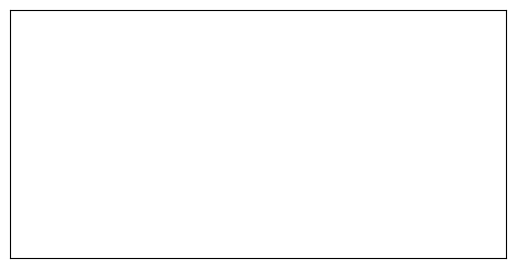

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from itertools import combinations
import random

# Define constants
BOX_WIDTH = 100
BOX_HEIGHT = 50
NUM_PARTICLES = 1
PARTICLE_RADIUS = 2  # Define a size for the particles
INITIAL_SPEED = 10
STEPS = 1200

# Modify the Particle class to include a history list
class Particle:
    def __init__(self, species, x, y, vx, vy):
        self.species = species
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.history = [(x, y)]  # Initialize history with the starting position

# Initialize particles with their histories
particles = [Particle('A', random.uniform(PARTICLE_RADIUS, BOX_WIDTH - PARTICLE_RADIUS),
                      random.uniform(PARTICLE_RADIUS, BOX_HEIGHT - PARTICLE_RADIUS),
                      INITIAL_SPEED, INITIAL_SPEED) for _ in range(NUM_PARTICLES)]

def update_positions(particles):
    for particle in particles:
        # Update positions
        particle.x += particle.vx
        particle.y += particle.vy
        # Add the new position to the history
        particle.history.append((particle.x, particle.y))
        # Bounce off walls
        if particle.x > BOX_WIDTH - PARTICLE_RADIUS or particle.x < PARTICLE_RADIUS:
            particle.vx *= -1
        if particle.y > BOX_HEIGHT - PARTICLE_RADIUS or particle.y < PARTICLE_RADIUS:
            particle.vy *= -1

fig, ax = plt.subplots()
ax.set_xlim(0, BOX_WIDTH)
ax.set_ylim(0, BOX_HEIGHT)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
species_colors = {'A': 'b'}
particles_drawing = [ax.plot([], [], 'o', ms=5, color=species_colors[particle.species])[0] for particle in particles]
paths = [ax.plot([], [], color=species_colors[particle.species], linewidth=1)[0] for particle in particles]  # For drawing paths

def init():
    for particle_drawing in particles_drawing:
        particle_drawing.set_data([], [])
    for path in paths:
        path.set_data([], [])
    return particles_drawing + paths

def animate(i):
    update_positions(particles)
    handle_collisions(particles)
    for particle_drawing, particle, path in zip(particles_drawing, particles, paths):
        particle_drawing.set_data([particle.x], [particle.y])
        path.set_data(*zip(*particle.history))  # Unpack positions and set path data
    return particles_drawing + paths

anim = FuncAnimation(fig, animate, init_func=init, frames=STEPS, interval=20, blit=True)

animation_file_path = 'particle_simulation_with_paths3.gif'
anim.save(animation_file_path, writer=PillowWriter(fps=30))

# After the animation is completed, plot the final state and save it as an image
def save_final_state(particles):
    fig, ax = plt.subplots()
    ax.set_xlim(0, BOX_WIDTH)
    ax.set_ylim(0, BOX_HEIGHT)
    ax.set_aspect(1)
    ax.set_xticks([])  # Remove x-axis labels
    ax.set_yticks([])  # Remove y-axis labels
    for particle in particles:
        ax.plot(particle.x, particle.y, 'o', ms=5, color=species_colors[particle.species])
    plt.savefig('final_state_2.png')  # Save the figure to a file

# At the end of your script, after the animation has been created
save_final_state(particles)
    
# To display the animation in the Jupyter Notebook
from IPython.display import Image
Image(url=animation_file_path)